In [102]:
#define model
import functools
import math

def oscillation(vec):
    x, y, dx, dy = vec[0], vec[1], vec[2], vec[3]
    nu = 0.012277471
    d_1 = ((x + nu)**2 + y**2)**(3/2) 
    d_2 = ((x - (1 - nu))**2 + y**2)**(3/2)
    ddx = x+2*dy-(1-nu)*(x+nu)/d_1-nu*(x-(1-nu))/d_2
    ddy = y-2*dx-(1-nu)*y/d_1-nu*y/d_2 
    return [dx, dy, ddx, ddy]

In [103]:
#computational method - ЯМРК(4)
import numpy as np

def rungekut(func, t_0, t_1, x_0):
    num_of_it = 10
    step = (t_1 - t_0) /num_of_it
    x_cur = x_0

    # k_1 = f(x_n, y_n)
    # k_2 = f(x_n + h/2, y_n + h/2 * k_1);
    # k_3 = f(x_n + h/2, y_n + h/2 * k_2);
    # k_4 = f(x_n + h, y_n + h * k_3);

    for i in range(num_of_it):
        k_1 = func(x_cur)
        k_2 = func(np.add(x_cur, np.dot(k_1, step/2)))
        k_3 = func(np.add(x_cur, np.dot(k_2, step/2)))
        k_4 = func(np.add(x_cur, np.dot(k_3, step)))

        # x_{n+1} = x_n + h/6 * (k_1 + 2*k_2 + 2*k_3 + k_4)

        # k_1 + 2*k_2
        temp_1 = np.add(k_1, np.dot(k_1, 2))
        # 2*k_3 + k_4
        temp_2 = np.add(np.dot(k_3, 2), k_4)
        # h/6 * (k_1 + 2*k_2 + 2*k_3 + k_4)
        temp_3 = np.dot(np.add(temp_1, temp_2), step/6)

        x_cur = np.add(x_cur, temp_3)

    return x_cur

In [104]:
#visualize

from matplotlib import pylab as plt
import math
import os

def create_frame_oscillation(t, x):
    plt.plot(x[0], x[1], 'ob', ms=1)
    plt.title('t = {time:.2f} c'.format(time=t))
    plt.xlabel('x')
    plt.ylabel('y')

In [111]:
def create_visual(model_func, create_frame_func):
    t_0 = 0
    t_1 = 17.0652165601579625588917206249
    x_0 = [0.994, 0, 0, -2.00158510637908252240537862224]
    step_num = 30000
    time_step = (t_1 - t_0) / step_num    
    
    t = t_0
    x = x_0
    create_frame_func(t, x)
    for i in range(step_num):
        x = rungekut(model_func, t, t + time_step, x)
        t = t + time_step
        create_frame_func(t, x)

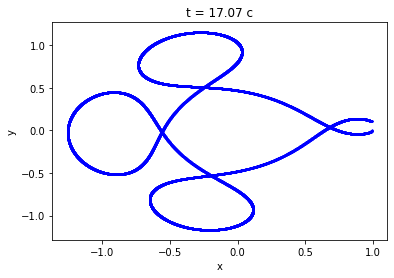

In [112]:
create_visual(oscillation, create_frame_oscillation)